# CNN


In [21]:
from keras.preprocessing.image import ImageDataGenerator
def create_generators(img_size = 128, datasetpath = 'dataset', batch_size = 32):
        datagen = ImageDataGenerator(
                             rescale = 1./255,
                             validation_split=0.2,
                             rotation_range=30,
                             shear_range = 0.2,
                             zoom_range = 0.2,
                             horizontal_flip = True)

        train_generator = datagen.flow_from_directory(
                                           datasetpath,
                                           subset="training",
                                           target_size = (img_size, img_size),
                                           class_mode = 'categorical', 
                                           batch_size = batch_size
                                           )

        validation_generator = datagen.flow_from_directory(datasetpath,
                                            subset="validation",
                                            target_size = (img_size, img_size),
                                            class_mode = 'categorical',
                                            batch_size = batch_size
                                            )
        return train_generator, validation_generator


In [9]:
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense, Dropout
def create_model (nb_filters = 32, nb_layers = 3, img_size = 128):
    
    model = Sequential()
    
    model.add(Convolution2D(nb_filters, (3, 3), input_shape=(img_size, img_size, 3),activation = 'relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    k = 1
    
    for i in range (2, (nb_layers + 1)):    
        k = k * 2
        model.add(Convolution2D(nb_filters * k, (3, 3),activation = 'relu'))
        model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
    model.add(Dense(64, activation = 'relu'))
    model.add(Dropout(0.5))
    model.add(Dense(4,activation = 'sigmoid'))

    model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

    return model

In [6]:
import matplotlib.pyplot as plt
def draw_graph(History, arg): #arg = acc|loss
    plt.tight_layout()
    plt.plot(History.history[arg])
    val_arg = 'val_' + arg
    plt.plot(History.history[val_arg])
    plt.title('Model '+ arg)
    plt.ylabel(arg)
    plt.xlabel('Epochs')
    plt.legend(['train', 'validation'])
    plt.show()

In [5]:
def save_model(model):
    model_json = model.to_json()
    with open("model.json", "w") as json_file:
        json_file.write(model_json)
    model.save_weights("model.h5")

Found 2496 images belonging to 4 classes.
Found 623 images belonging to 4 classes.


D:\Programs\Anaconda\envs\env\lib\site-packages\ipykernel_launcher.py:14: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  
D:\Programs\Anaconda\envs\env\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., steps_per_epoch=156, validation_data=<keras_pre..., validation_steps=39, callbacks=[<keras.ca..., epochs=50)`
  


Epoch 1/50
156/156 [==============================] - 22s 142ms/step - loss: 1.2081 - acc: 0.4343 - val_loss: 1.0030 - val_acc: 0.6132
Epoch 2/50
156/156 [==============================] - 23s 144ms/step - loss: 1.0422 - acc: 0.5569 - val_loss: 1.0065 - val_acc: 0.6228
Epoch 3/50
156/156 [==============================] - 22s 142ms/step - loss: 1.0073 - acc: 0.5697 - val_loss: 0.9049 - val_acc: 0.6372
Epoch 4/50
156/156 [==============================] - 22s 142ms/step - loss: 0.9433 - acc: 0.6122 - val_loss: 0.8773 - val_acc: 0.6388
Epoch 5/50
156/156 [==============================] - 22s 142ms/step - loss: 0.9175 - acc: 0.6342 - val_loss: 0.8740 - val_acc: 0.6533
Epoch 6/50
156/156 [==============================] - 22s 142ms/step - loss: 0.8874 - acc: 0.6358 - val_loss: 0.8097 - val_acc: 0.6822
Epoch 7/50
156/156 [==============================] - 22s 140ms/step - loss: 0.8791 - acc: 0.6430 - val_loss: 0.8494 - val_acc: 0.6453
Epoch 8/50
156/156 [==============================] - 2

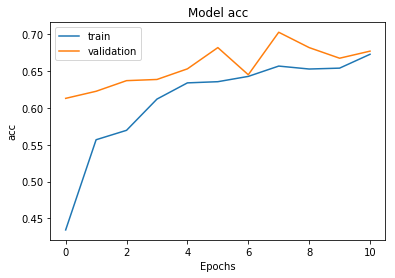

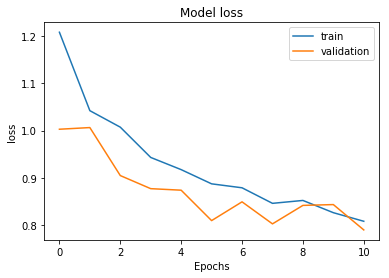

Epoch 1/50
156/156 [==============================] - 23s 149ms/step - loss: 1.2668 - acc: 0.3690 - val_loss: 1.0479 - val_acc: 0.5490
Epoch 2/50
156/156 [==============================] - 22s 141ms/step - loss: 1.0406 - acc: 0.5645 - val_loss: 0.9760 - val_acc: 0.5891
Epoch 3/50
156/156 [==============================] - 22s 139ms/step - loss: 0.9796 - acc: 0.5938 - val_loss: 0.9202 - val_acc: 0.6276
Epoch 4/50
156/156 [==============================] - 23s 147ms/step - loss: 0.9412 - acc: 0.6078 - val_loss: 0.8637 - val_acc: 0.6324
Epoch 5/50
156/156 [==============================] - 21s 138ms/step - loss: 0.8972 - acc: 0.6250 - val_loss: 0.8724 - val_acc: 0.6132
Epoch 6/50
156/156 [==============================] - 23s 145ms/step - loss: 0.8995 - acc: 0.6298 - val_loss: 0.7920 - val_acc: 0.6790
Epoch 7/50
156/156 [==============================] - 22s 139ms/step - loss: 0.8534 - acc: 0.6591 - val_loss: 0.9243 - val_acc: 0.5939
Epoch 8/50
156/156 [==============================] - 2

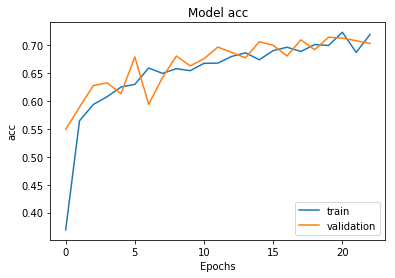

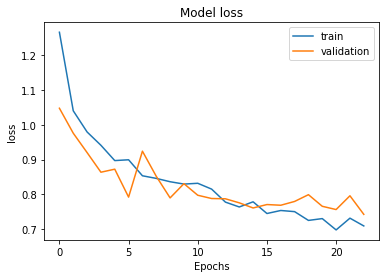

Epoch 1/50
156/156 [==============================] - 26s 169ms/step - loss: 1.2065 - acc: 0.4403 - val_loss: 1.0280 - val_acc: 0.6019
Epoch 2/50
156/156 [==============================] - 25s 161ms/step - loss: 1.0514 - acc: 0.5613 - val_loss: 0.9014 - val_acc: 0.6501
Epoch 3/50
156/156 [==============================] - 25s 163ms/step - loss: 0.9635 - acc: 0.6010 - val_loss: 0.9173 - val_acc: 0.6148
Epoch 4/50
156/156 [==============================] - 25s 161ms/step - loss: 0.9622 - acc: 0.6046 - val_loss: 0.8562 - val_acc: 0.6677
Epoch 5/50
156/156 [==============================] - 26s 164ms/step - loss: 0.8980 - acc: 0.6186 - val_loss: 0.8282 - val_acc: 0.6533
Epoch 6/50
156/156 [==============================] - 25s 163ms/step - loss: 0.8749 - acc: 0.6394 - val_loss: 0.8349 - val_acc: 0.6597
Epoch 7/50
156/156 [==============================] - 25s 159ms/step - loss: 0.8480 - acc: 0.6595 - val_loss: 0.7969 - val_acc: 0.6597

Number of layers: 3 ImgSize: 64 Batch size: 16:


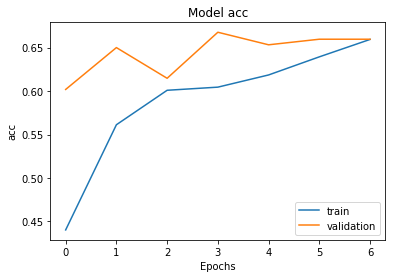

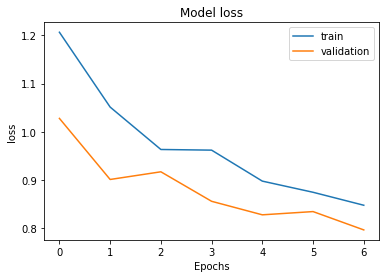

Epoch 1/50
156/156 [==============================] - 29s 187ms/step - loss: 1.1781 - acc: 0.4663 - val_loss: 1.0313 - val_acc: 0.5361
Epoch 2/50
156/156 [==============================] - 28s 178ms/step - loss: 1.0248 - acc: 0.5709 - val_loss: 1.0164 - val_acc: 0.5602
Epoch 3/50
156/156 [==============================] - 28s 177ms/step - loss: 1.0015 - acc: 0.5761 - val_loss: 0.9388 - val_acc: 0.5795
Epoch 4/50
156/156 [==============================] - 28s 178ms/step - loss: 0.9131 - acc: 0.6078 - val_loss: 0.8271 - val_acc: 0.6404
Epoch 5/50
156/156 [==============================] - 28s 179ms/step - loss: 0.8781 - acc: 0.6298 - val_loss: 0.8293 - val_acc: 0.6453
Epoch 6/50
156/156 [==============================] - 28s 179ms/step - loss: 0.8428 - acc: 0.6434 - val_loss: 0.8212 - val_acc: 0.6356
Epoch 7/50
156/156 [==============================] - 27s 175ms/step - loss: 0.8256 - acc: 0.6390 - val_loss: 0.8583 - val_acc: 0.6709
Epoch 8/50
156/156 [==============================] - 2

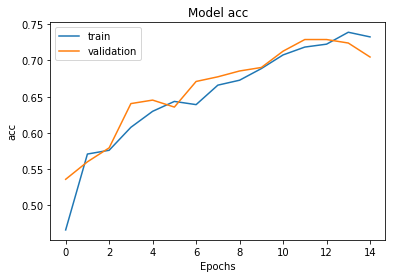

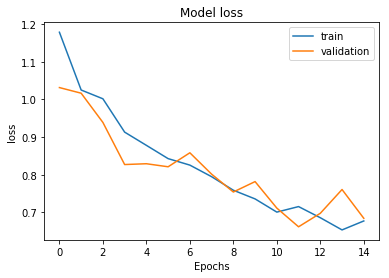

Epoch 1/50
156/156 [==============================] - 33s 208ms/step - loss: 1.2228 - acc: 0.4415 - val_loss: 1.1105 - val_acc: 0.5201
Epoch 2/50
156/156 [==============================] - 30s 192ms/step - loss: 1.0306 - acc: 0.5613 - val_loss: 0.8742 - val_acc: 0.6003
Epoch 3/50
156/156 [==============================] - 30s 194ms/step - loss: 0.9229 - acc: 0.5966 - val_loss: 0.8305 - val_acc: 0.6148
Epoch 4/50
156/156 [==============================] - 30s 194ms/step - loss: 0.8919 - acc: 0.6182 - val_loss: 0.8188 - val_acc: 0.6260
Epoch 5/50
156/156 [==============================] - 31s 196ms/step - loss: 0.8569 - acc: 0.6462 - val_loss: 0.7833 - val_acc: 0.6581
Epoch 6/50
156/156 [==============================] - 30s 190ms/step - loss: 0.8433 - acc: 0.6510 - val_loss: 0.8134 - val_acc: 0.6437
Epoch 7/50
156/156 [==============================] - 30s 193ms/step - loss: 0.8083 - acc: 0.6558 - val_loss: 0.8321 - val_acc: 0.6292
Epoch 8/50
156/156 [==============================] - 3

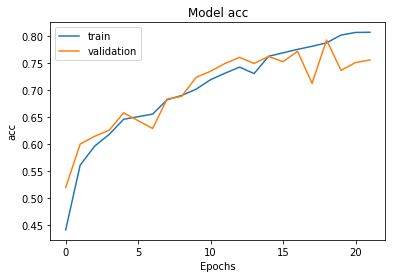

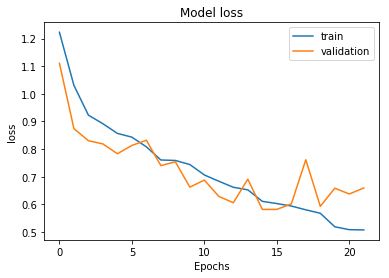

Found 2496 images belonging to 4 classes.
Found 623 images belonging to 4 classes.


D:\Programs\Anaconda\envs\env\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., steps_per_epoch=78, validation_data=<keras_pre..., validation_steps=20, callbacks=[<keras.ca..., epochs=50)`
  


Epoch 1/50
78/78 [==============================] - 20s 255ms/step - loss: 1.2112 - acc: 0.4543 - val_loss: 0.9966 - val_acc: 0.5811
Epoch 2/50
78/78 [==============================] - 19s 239ms/step - loss: 1.0229 - acc: 0.5761 - val_loss: 0.9288 - val_acc: 0.6019
Epoch 3/50
78/78 [==============================] - 19s 242ms/step - loss: 0.9753 - acc: 0.6090 - val_loss: 0.9010 - val_acc: 0.6308
Epoch 4/50
78/78 [==============================] - 19s 242ms/step - loss: 0.9378 - acc: 0.6246 - val_loss: 0.8803 - val_acc: 0.6581
Epoch 5/50
78/78 [==============================] - 19s 239ms/step - loss: 0.9048 - acc: 0.6342 - val_loss: 0.8712 - val_acc: 0.6613
Epoch 6/50
78/78 [==============================] - 19s 238ms/step - loss: 0.9117 - acc: 0.6242 - val_loss: 0.8521 - val_acc: 0.6597
Epoch 7/50
78/78 [==============================] - 19s 241ms/step - loss: 0.8656 - acc: 0.6506 - val_loss: 0.8627 - val_acc: 0.6501
Epoch 8/50
78/78 [==============================] - 19s 242ms/step - 

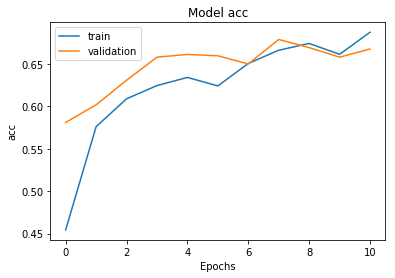

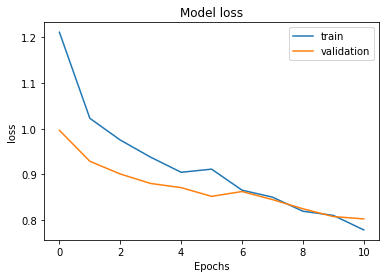

Epoch 1/50
78/78 [==============================] - 20s 262ms/step - loss: 1.2750 - acc: 0.3890 - val_loss: 1.0591 - val_acc: 0.5586
Epoch 2/50
78/78 [==============================] - 18s 237ms/step - loss: 1.0833 - acc: 0.5284 - val_loss: 0.9461 - val_acc: 0.6212
Epoch 3/50
78/78 [==============================] - 19s 248ms/step - loss: 1.0030 - acc: 0.5673 - val_loss: 0.9620 - val_acc: 0.5795
Epoch 4/50
78/78 [==============================] - 19s 241ms/step - loss: 0.9897 - acc: 0.5925 - val_loss: 0.8891 - val_acc: 0.6292
Epoch 5/50
78/78 [==============================] - 19s 238ms/step - loss: 0.9605 - acc: 0.5909 - val_loss: 0.9070 - val_acc: 0.6244
Epoch 6/50
78/78 [==============================] - 18s 236ms/step - loss: 0.9543 - acc: 0.5994 - val_loss: 0.8772 - val_acc: 0.6629
Epoch 7/50
78/78 [==============================] - 19s 242ms/step - loss: 0.8953 - acc: 0.6234 - val_loss: 0.8543 - val_acc: 0.6501
Epoch 8/50
78/78 [==============================] - 19s 241ms/step - 

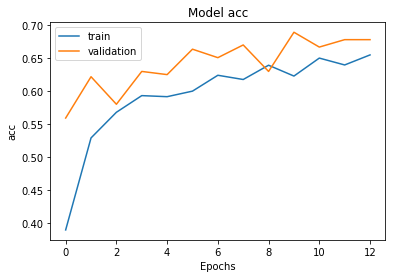

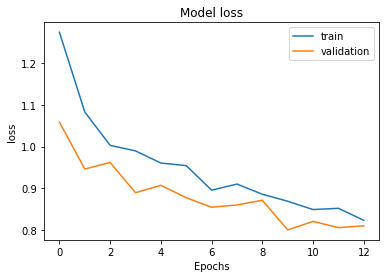

Epoch 1/50
78/78 [==============================] - 25s 321ms/step - loss: 1.2378 - acc: 0.4203 - val_loss: 0.9807 - val_acc: 0.6019
Epoch 2/50
78/78 [==============================] - 23s 293ms/step - loss: 1.0471 - acc: 0.5421 - val_loss: 0.9679 - val_acc: 0.6244
Epoch 3/50
78/78 [==============================] - 24s 302ms/step - loss: 0.9786 - acc: 0.5946 - val_loss: 0.8866 - val_acc: 0.5971
Epoch 4/50
78/78 [==============================] - 23s 299ms/step - loss: 0.9346 - acc: 0.6062 - val_loss: 0.9539 - val_acc: 0.6035
Epoch 5/50
78/78 [==============================] - 24s 304ms/step - loss: 0.9149 - acc: 0.6230 - val_loss: 0.8385 - val_acc: 0.6533
Epoch 6/50
78/78 [==============================] - 23s 294ms/step - loss: 0.8836 - acc: 0.6386 - val_loss: 0.8015 - val_acc: 0.6549
Epoch 7/50
78/78 [==============================] - 24s 306ms/step - loss: 0.8604 - acc: 0.6450 - val_loss: 0.8158 - val_acc: 0.6629
Epoch 8/50
78/78 [==============================] - 23s 289ms/step - 

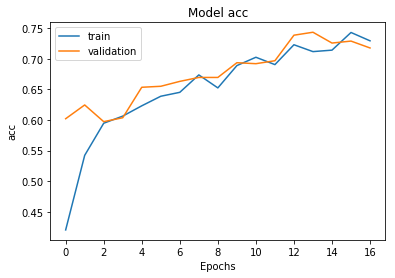

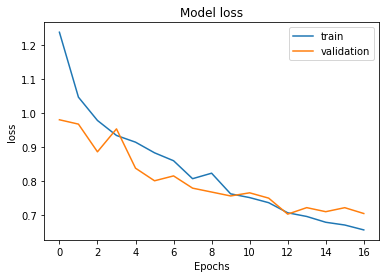

Epoch 1/50
78/78 [==============================] - 27s 346ms/step - loss: 1.1596 - acc: 0.4663 - val_loss: 1.0068 - val_acc: 0.5698
Epoch 2/50
78/78 [==============================] - 26s 333ms/step - loss: 1.0157 - acc: 0.5629 - val_loss: 0.9178 - val_acc: 0.5923
Epoch 3/50
78/78 [==============================] - 25s 326ms/step - loss: 0.9364 - acc: 0.5869 - val_loss: 0.8849 - val_acc: 0.5955
Epoch 4/50
78/78 [==============================] - 26s 333ms/step - loss: 0.9205 - acc: 0.6174 - val_loss: 0.8493 - val_acc: 0.6244
Epoch 5/50
78/78 [==============================] - 25s 326ms/step - loss: 0.8795 - acc: 0.6174 - val_loss: 0.8193 - val_acc: 0.6196
Epoch 6/50
78/78 [==============================] - 25s 326ms/step - loss: 0.8772 - acc: 0.6286 - val_loss: 0.7988 - val_acc: 0.6404
Epoch 7/50
78/78 [==============================] - 26s 335ms/step - loss: 0.8206 - acc: 0.6390 - val_loss: 0.8399 - val_acc: 0.6356
Epoch 8/50
78/78 [==============================] - 25s 326ms/step - 

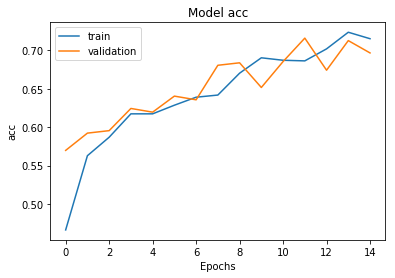

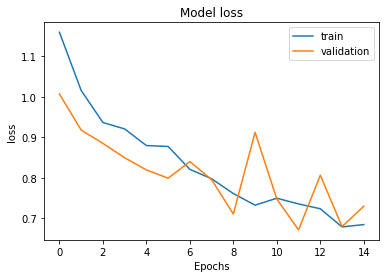

Epoch 1/50
78/78 [==============================] - 30s 381ms/step - loss: 1.2780 - acc: 0.3598 - val_loss: 1.1683 - val_acc: 0.4783
Epoch 2/50
78/78 [==============================] - 29s 373ms/step - loss: 1.1106 - acc: 0.5216 - val_loss: 0.9354 - val_acc: 0.6019
Epoch 3/50
78/78 [==============================] - 28s 354ms/step - loss: 0.9853 - acc: 0.5745 - val_loss: 0.8849 - val_acc: 0.6019
Epoch 4/50
78/78 [==============================] - 28s 354ms/step - loss: 0.9281 - acc: 0.5942 - val_loss: 0.8975 - val_acc: 0.5955
Epoch 5/50
78/78 [==============================] - 28s 359ms/step - loss: 0.9169 - acc: 0.6126 - val_loss: 0.7718 - val_acc: 0.6356
Epoch 6/50
78/78 [==============================] - 28s 355ms/step - loss: 0.8594 - acc: 0.6250 - val_loss: 0.7654 - val_acc: 0.6597
Epoch 7/50
78/78 [==============================] - 28s 354ms/step - loss: 0.8408 - acc: 0.6278 - val_loss: 0.8129 - val_acc: 0.6485
Epoch 8/50
78/78 [==============================] - 33s 420ms/step - 

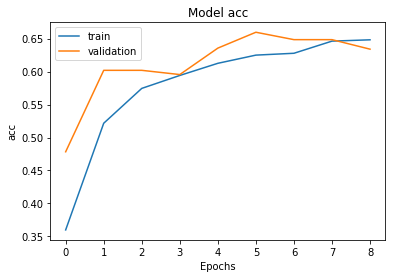

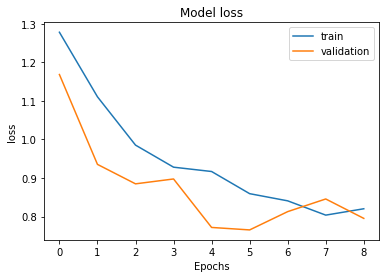

Found 2496 images belonging to 4 classes.
Found 623 images belonging to 4 classes.


D:\Programs\Anaconda\envs\env\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., steps_per_epoch=39, validation_data=<keras_pre..., validation_steps=10, callbacks=[<keras.ca..., epochs=50)`
  


Epoch 1/50
39/39 [==============================] - 20s 521ms/step - loss: 1.4136 - acc: 0.2684 - val_loss: 1.3704 - val_acc: 0.2745
Epoch 2/50
39/39 [==============================] - 19s 486ms/step - loss: 1.2764 - acc: 0.3482 - val_loss: 1.1129 - val_acc: 0.5265
Epoch 3/50
39/39 [==============================] - 18s 465ms/step - loss: 1.1021 - acc: 0.5240 - val_loss: 1.0023 - val_acc: 0.6083
Epoch 4/50
39/39 [==============================] - 18s 462ms/step - loss: 1.0129 - acc: 0.5721 - val_loss: 0.9382 - val_acc: 0.6132
Epoch 5/50
39/39 [==============================] - 18s 457ms/step - loss: 0.9904 - acc: 0.5933 - val_loss: 0.8974 - val_acc: 0.6196
Epoch 6/50
39/39 [==============================] - 20s 506ms/step - loss: 0.9551 - acc: 0.6110 - val_loss: 0.8801 - val_acc: 0.6581
Epoch 7/50
39/39 [==============================] - 18s 462ms/step - loss: 0.9418 - acc: 0.6186 - val_loss: 0.8713 - val_acc: 0.6469
Epoch 8/50
39/39 [==============================] - 17s 432ms/step - 

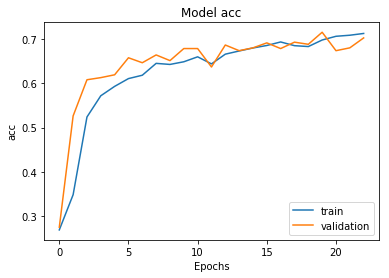

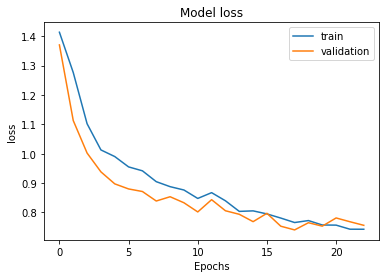

Epoch 1/50
29/39 [=====================>........] - ETA: 4s - loss: 1.4128 - acc: 0.2737

In [ ]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_acc', patience=3)

for img_size in [64,128]: 
    for batch_size in [16,32,64]:
        train_generator, validation_generator = create_generators(img_size = img_size, batch_size = batch_size)
        for nb_layers in range(1,6):
            model = create_model(32,nb_layers,img_size = img_size)
            History = model.fit_generator(train_generator,
                              steps_per_epoch = len(train_generator),
                              nb_epoch = 50,
                              validation_data = validation_generator,
                              validation_steps = len(validation_generator),
                              callbacks=[early_stopping]
                             )
            print('\nNumber of layers: ' + str(nb_layers) + ' ImgSize: ' + str(img_size) + ' Batch size: ' + str(batch_size) + ':')
            draw_graph(History, 'acc')
            draw_graph(History, 'loss')
        


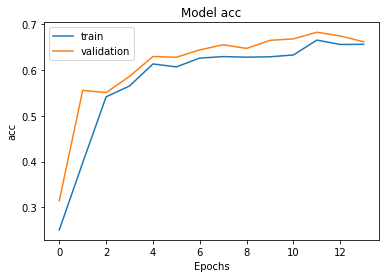

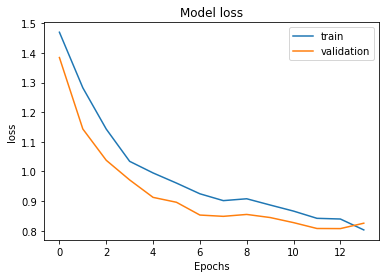

In [15]:
save_model(model)

draw_graph(History, 'acc')
draw_graph(History, 'loss')

In [ ]:
from keras.preprocessing import image
img = image.load_img(path="sunflower.jpg",target_size=(128,128,3))
plt.imshow(img)
plt.show()
img = np.reshape(img,[1,128,128,3])
img_class = model.predict([img])
prediction = img_class[0]
print(prediction)